In [1]:
%matplotlib inline

**1**. (25 points)

We have a surgeon who wants to find rich, obese patients for bariatric surgery. The surgeon purchases 3rd party databases that include the following:

- patients - includes height and weight for 100 patients
- finances - income of patients
- orders - patients who have bought weight loss products before

We want to help the surgeon find his potential patients. Her criteria are

- patient must be obese with BMI (weight (kg) / (height (m) * height (m))
- patient must be rich - income > $100,000
- patient must have bought weight loss products previously

Find the patient names, bmi and income for those meeting the 3 criteria using

- EQUIJOIN (no subqueries)
- INNER JOIN (no subqueries)
- Subqueries
- Common table expressions
- Views

In [2]:
from faker import Faker
import numpy as np
import pandas as pd

In [3]:
np.random.seed(123)

fake = Faker()
names = [fake.name() for i in range(100)]
hts = np.random.normal(1.7, 0.1, 100)
wts = np.random.normal(85, 10, 100)
patients = pd.DataFrame(dict(name=names, wt=wts, ht=hts))
patients.index.name = 'patient_id'

incomes = np.random.np.random.lognormal(11, 1, 100).astype('int')
finances = pd.DataFrame(dict(income=incomes, patient_id=np.random.permutation(100)))
finances.index.name = 'finance_id'

order_total = np.random.randint(100, 100000, 200)
patient_ids = np.random.randint(0, 500, 200)
orders = pd.DataFrame(dict(sales=order_total, patient_id=patient_ids))
orders.index.name = 'order_id'

In [4]:
%load_ext sql
%sql sqlite://

'Connected: None@None'

In [5]:
%sql DROP TABLE IF EXISTS patients
%sql DROP TABLE IF EXISTS finances
%sql DROP TABLE IF EXISTS orders

Done.
Done.
Done.


[]

In [6]:
%sql PERSIST patients
%sql PERSIST finances
%sql PERSIST orders

'Persisted orders'

Using EQUIJOIN

Using INNEr JOIN

Using subtable.

Using CTE

Using views.

**2**. (25 points)

Use windows functions in SQL to achieve the same effect as these `pandas` operations.`m

In [12]:
url = 'https://raw.githubusercontent.com/statsmodels/statsmodels/master/statsmodels/datasets/nile/nile.csv'
nile = pd.read_csv(url, index_col=0)

In [13]:
%sql PERSIST nile

'Persisted nile'

In [14]:
nile.shape

(100, 1)

In [15]:
nile.head(3)

,volume
year,
1871,1120
1872,1160
1873,963


In [16]:
a1 = nile.rolling(5, min_periods=1).mean()
a1.head(6)

,volume
year,
1871,1120.00
1872,1140.00
1873,1081.00
1874,1113.25
1875,1122.60
1876,1130.60


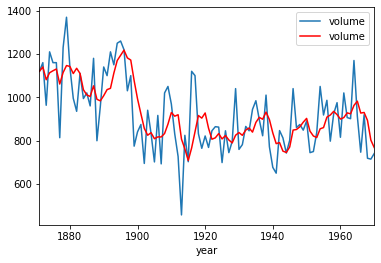

In [17]:
ax = nile.plot()
a1.plot(color='red', ax=ax)
pass

SQL solution here

In [19]:
a2 = nile.rolling(5, center=True, min_periods=1).mean()
a2.head(6)

,volume
year,
1871,1081.00
1872,1113.25
1873,1122.60
1874,1130.60
1875,1061.20
1876,1114.60


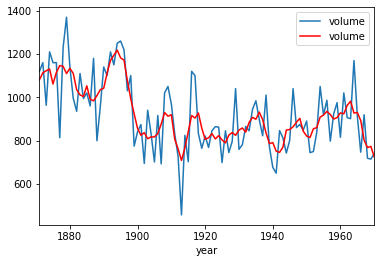

In [20]:
ax = nile.plot()
a2.plot(color='red', ax=ax)
pass

SQL solution here

In [22]:
a3 = nile.expanding().mean()
a3.head(6)

,volume
year,
1871,1120.000000
1872,1140.000000
1873,1081.000000
1874,1113.250000
1875,1122.600000
1876,1128.833333


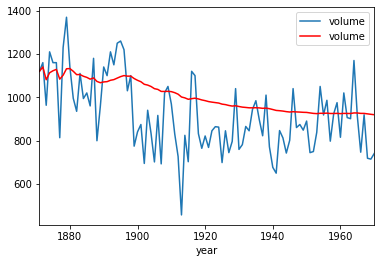

In [23]:
ax = nile.plot()
a3.plot(color='red', ax=ax)
pass

SQL solution here

In [25]:
a4 = nile.rank(method='dense').sort_values('volume')
a4.head(6)

,volume
year,
1913,1.0
1941,2.0
1940,3.0
1907,4.0
1902,5.0
1925,6.0


SQL solution here

In [27]:
quartiles = pd.qcut(nile.volume, 
            np.linspace(0,1,5), 
            labels=['Q1', 'Q2', 'Q3', 'Q4'])
quartiles.name = 'quartile'
quartiles
df = pd.concat([nile, quartiles], axis=1)

In [28]:
df.groupby('quartile').sum()

,volume
quartile,
Q1,18101
Q2,20999
Q3,23995
Q4,28840


SQL solution here

**3**. (50 points)

Convert the flat file data in `h04q03.csv` into a well-structured relational database (i.e. at least in 3NF) in SQLite3 as `ho4q03.db`. Note - salary information is confidential and should be kept in a separate table from other personal data.

- Use only `pandas` operations.
- Do not make use of SQL line or cell magic

In [30]:
df = pd.read_csv('h04q03.csv')